In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

In [ ]:
df= pd.read_excel("combined_data.xlsm")
df

,district,Year,actual_rainfall_in_mm,normal_rainfall_in_mm,Mid_year_population,fatalities_(lives_lost),no_of_camps,total_damaged_houses_(partially_or_fully),no_of_landslides,total_crop_sector_damage_(in_INR_crore),Fisheries_sector_damage_(in_INR_lakh),"livestock_loss_(cows,buffalo,sheep/goat,poultry,pig,quail,heifer)"
0,Thiruvananthapuram,2018,373.8,142.0,3355148,11,94,2572,0,113.40,143.000,10662
1,Kollam,2018,644.1,258.7,2659431,5,168,3384,2,54.60,152.000,5755
2,Pathanamthitta,2018,764.9,352.7,1172212,3,4352,17805,8,218.90,277.000,99317
3,Alappuzha,2018,608.2,343.1,2146033,43,2126,40922,0,353.80,1153.000,507938
4,Kottayam,2018,619.2,386.0,1983573,14,788,17108,29,71.00,607.000,39944
5,Idukki,2018,1478.9,527.3,1093156,54,363,8496,143,588.80,123.000,9560
6,Ernakulam,2018,648.3,401.3,3427659,58,1582,88671,0,129.30,1344.000,234658
7,Thrissur,2018,734.7,440.1,3243170,72,1513,24453,26,197.40,3956.000,257118
8,Palakkad,2018,848.8,333.8,2952254,20,165,8073,20,108.60,73.000,11117
9,Malappuram,2018,913.7,395.3,4494998,30,213,7630,30,161.30,274.000,391971


In [ ]:
# Calculate rainfall deviation
df['rainfall_deviation'] = (df['actual_rainfall_in_mm'] - df['normal_rainfall_in_mm']) / df['normal_rainfall_in_mm']
df

,district,Year,actual_rainfall_in_mm,normal_rainfall_in_mm,Mid_year_population,fatalities_(lives_lost),no_of_camps,total_damaged_houses_(partially_or_fully),no_of_landslides,total_crop_sector_damage_(in_INR_crore),Fisheries_sector_damage_(in_INR_lakh),"livestock_loss_(cows,buffalo,sheep/goat,poultry,pig,quail,heifer)",rainfall_deviation
0,Thiruvananthapuram,2018,373.8,142.0,3355148,11,94,2572,0,113.40,143.000,10662,1.632394
1,Kollam,2018,644.1,258.7,2659431,5,168,3384,2,54.60,152.000,5755,1.489756
2,Pathanamthitta,2018,764.9,352.7,1172212,3,4352,17805,8,218.90,277.000,99317,1.168699
3,Alappuzha,2018,608.2,343.1,2146033,43,2126,40922,0,353.80,1153.000,507938,0.772661
4,Kottayam,2018,619.2,386.0,1983573,14,788,17108,29,71.00,607.000,39944,0.604145
5,Idukki,2018,1478.9,527.3,1093156,54,363,8496,143,588.80,123.000,9560,1.804665
6,Ernakulam,2018,648.3,401.3,3427659,58,1582,88671,0,129.30,1344.000,234658,0.615500
7,Thrissur,2018,734.7,440.1,3243170,72,1513,24453,26,197.40,3956.000,257118,0.669393
8,Palakkad,2018,848.8,333.8,2952254,20,165,8073,20,108.60,73.000,11117,1.542840
9,Malappuram,2018,913.7,395.3,4494998,30,213,7630,30,161.30,274.000,391971,1.311409


In [ ]:
# Step 1: Per capita columns
df['fatalities_pc'] = df['fatalities_(lives_lost)'] / df['Mid_year_population']
df['damaged_houses_pc'] = df['total_damaged_houses_(partially_or_fully)'] / df['Mid_year_population']
df['crop_damage_pc'] = df['total_crop_sector_damage_(in_INR_crore)'] * 1e7 / df['Mid_year_population']  # crore → INR
df['fisheries_damage_pc'] = df['Fisheries_sector_damage_(in_INR_lakh)'] * 1e5 / df['Mid_year_population']  # lakh → INR
df['livestock_loss_pc'] = df['livestock_loss_(cows,buffalo,sheep/goat,poultry,pig,quail,heifer)'] / df['Mid_year_population']
df['camps_pc'] = df['no_of_camps'] / df['Mid_year_population']

In [ ]:
# Step 2: Min-max normalize to create *_pc_norm
cols_to_norm = [
    'fatalities_pc', 'damaged_houses_pc', 'crop_damage_pc',
    'fisheries_damage_pc', 'livestock_loss_pc', 'camps_pc',
    'no_of_landslides', 'rainfall_deviation'
]

df_normalized = df.copy()
for col in cols_to_norm:
    df_normalized[col + '_norm'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

In [ ]:
df_normalized

,district,Year,actual_rainfall_in_mm,normal_rainfall_in_mm,Mid_year_population,fatalities_(lives_lost),no_of_camps,total_damaged_houses_(partially_or_fully),no_of_landslides,total_crop_sector_damage_(in_INR_crore),...,livestock_loss_pc,camps_pc,fatalities_pc_norm,damaged_houses_pc_norm,crop_damage_pc_norm,fisheries_damage_pc_norm,livestock_loss_pc_norm,camps_pc_norm,no_of_landslides_norm,rainfall_deviation_norm
0,Thiruvananthapuram,2018,373.8,142.0,3355148,11,94,2572,0,113.40,...,0.003178,0.000028,0.066370,0.027341,0.040597,0.034941,0.013426,0.007162,0.000000,0.751099
1,Kollam,2018,644.1,258.7,2659431,5,168,3384,2,54.60,...,0.002164,0.000063,0.038060,0.046942,0.017763,0.046856,0.009143,0.016634,0.013986,0.685430
2,Pathanamthitta,2018,764.9,352.7,1172212,3,4352,17805,8,218.90,...,0.084726,0.003713,0.051809,0.586179,0.303804,0.193726,0.357967,1.000000,0.055944,0.537619
3,Alappuzha,2018,608.2,343.1,2146033,43,2126,40922,0,353.80,...,0.236687,0.000991,0.405621,0.736496,0.266152,0.440460,1.000000,0.266552,0.000000,0.355289
4,Kottayam,2018,619.2,386.0,1983573,14,788,17108,29,71.00,...,0.020137,0.000397,0.142879,0.331827,0.044030,0.250873,0.085080,0.106657,0.202797,0.277706
5,Idukki,2018,1478.9,527.3,1093156,54,363,8496,143,588.80,...,0.008745,0.000332,1.000000,0.298781,0.909380,0.092244,0.036949,0.089089,1.000000,0.830410
6,Ernakulam,2018,648.3,401.3,3427659,58,1582,88671,0,129.30,...,0.068460,0.000462,0.342546,1.000000,0.047349,0.321451,0.289243,0.123976,0.000000,0.282934
7,Thrissur,2018,734.7,440.1,3243170,72,1513,24453,26,197.40,...,0.079280,0.000467,0.449419,0.289786,0.087179,1.000000,0.334957,0.125318,0.181818,0.307746
8,Palakkad,2018,848.8,333.8,2952254,20,165,8073,20,108.60,...,0.003766,0.000056,0.137140,0.103593,0.045737,0.020271,0.015910,0.014672,0.139860,0.709869
9,Malappuram,2018,913.7,395.3,4494998,30,213,7630,30,161.30,...,0.087202,0.000047,0.135108,0.063409,0.044186,0.049973,0.368426,0.012381,0.209790,0.603321


In [ ]:
import pandas as pd

pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", None)       # Prevent line wrapping

df.describe()


,Year,actual_rainfall_in_mm,normal_rainfall_in_mm,Mid_year_population,fatalities_(lives_lost),no_of_camps,total_damaged_houses_(partially_or_fully),no_of_landslides,total_crop_sector_damage_(in_INR_crore),Fisheries_sector_damage_(in_INR_lakh),"livestock_loss_(cows,buffalo,sheep/goat,poultry,pig,quail,heifer)",rainfall_deviation,fatalities_pc,damaged_houses_pc,crop_damage_pc,fisheries_damage_pc,livestock_loss_pc,camps_pc
count,28.000000,28.000000,28.000000,2.800000e+01,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2018.500000,852.557143,420.296429,2.480013e+06,16.571429,503.750000,9124.892857,14.142857,236.031786,302.888071,75299.750000,1.099180,0.000007,0.004147,1220.962174,11.736426,0.027912,0.000289
std,0.509175,282.637808,135.848070,1.060718e+06,21.012216,917.854851,18061.775632,27.892272,290.883746,790.057632,133186.518156,0.497276,0.000010,0.006547,1680.726164,25.616284,0.050230,0.000708
min,2018.000000,325.000000,142.000000,8.466370e+05,0.000000,2.000000,127.000000,0.000000,14.200000,0.000000,0.000000,0.000943,0.000000,0.000061,102.092611,0.000000,0.000000,0.000001
25%,2018.000000,647.250000,337.775000,1.399852e+06,2.000000,90.750000,492.500000,0.000000,56.677500,0.639750,3328.000000,0.746844,0.000001,0.000239,312.695050,0.026766,0.001605,0.000028
50%,2018.500000,800.450000,396.900000,2.643940e+06,7.500000,174.500000,2400.500000,6.000000,123.965000,9.466500,10918.000000,1.111396,0.000003,0.000794,383.552987,0.441737,0.004089,0.000062
75%,2019.000000,1055.625000,530.700000,3.264018e+06,17.750000,372.000000,7803.000000,17.250000,252.625000,163.250000,55920.000000,1.424886,0.000007,0.007598,1692.090671,7.384705,0.034140,0.000272
max,2019.000000,1478.900000,658.900000,4.551048e+06,72.000000,4352.000000,88671.000000,143.000000,1299.590000,3956.000000,507938.000000,2.173030,0.000049,0.025869,5912.805606,121.979421,0.236687,0.003713


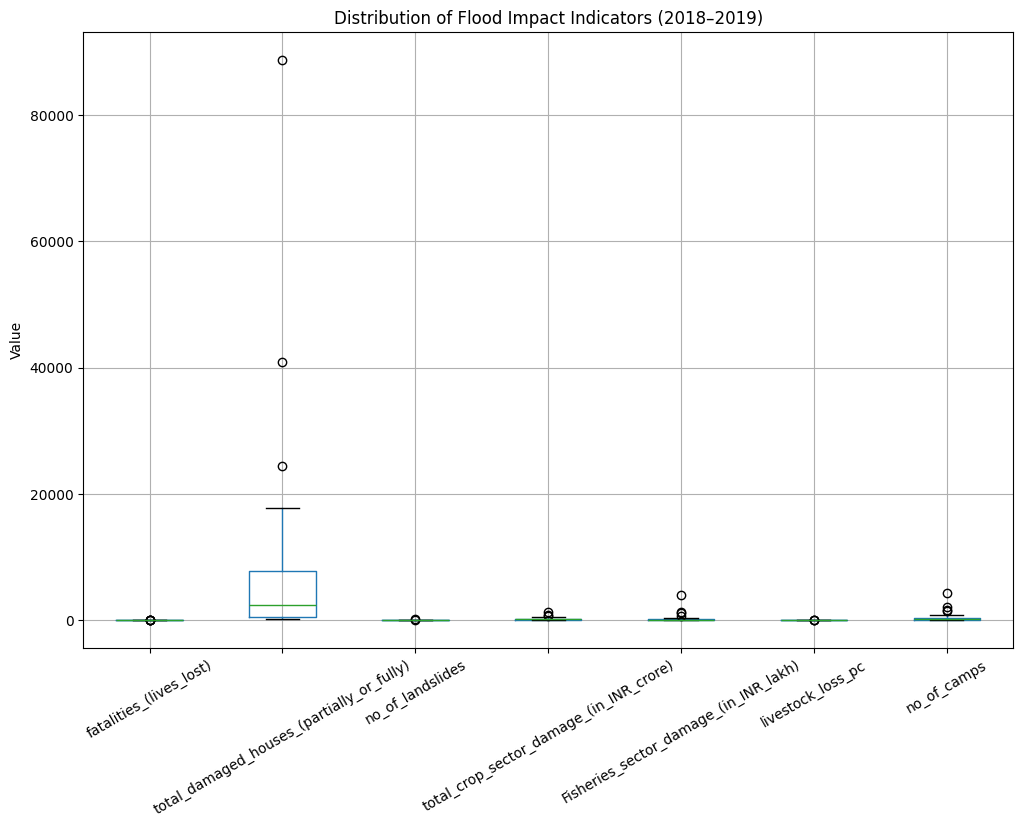

In [ ]:
import matplotlib.pyplot as plt

# List of key indicators for boxplots
indicators = [
    "fatalities_(lives_lost)",
    "total_damaged_houses_(partially_or_fully)",
    "no_of_landslides",
    "total_crop_sector_damage_(in_INR_crore)",
    "Fisheries_sector_damage_(in_INR_lakh)",
    "livestock_loss_pc",
    "no_of_camps"
]

# Create boxplots
plt.figure(figsize=(12, 8))
df.boxplot(column=indicators)
plt.title("Distribution of Flood Impact Indicators (2018–2019)")
plt.ylabel("Value")
plt.xticks(rotation=30)
plt.show()


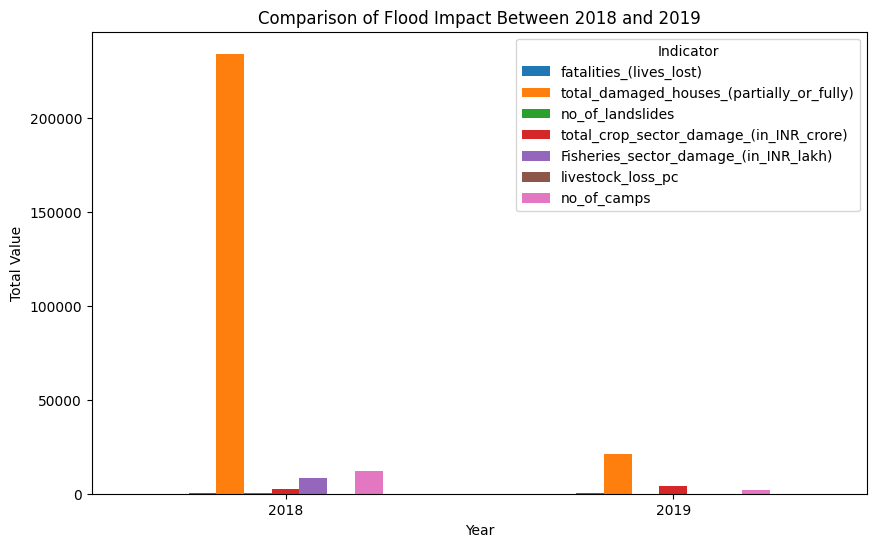

In [ ]:
# Group by Year and sum values
yearly_totals = df.groupby("Year")[[
    "fatalities_(lives_lost)",
    "total_damaged_houses_(partially_or_fully)",
    "no_of_landslides",
    "total_crop_sector_damage_(in_INR_crore)",
    "Fisheries_sector_damage_(in_INR_lakh)",
    "livestock_loss_pc",
    "no_of_camps"
]].sum()

# Bar chart
yearly_totals.plot(kind="bar", figsize=(10, 6))
plt.title("Comparison of Flood Impact Between 2018 and 2019")
plt.ylabel("Total Value")
plt.xticks(rotation=0)
plt.legend(title="Indicator")
plt.show()


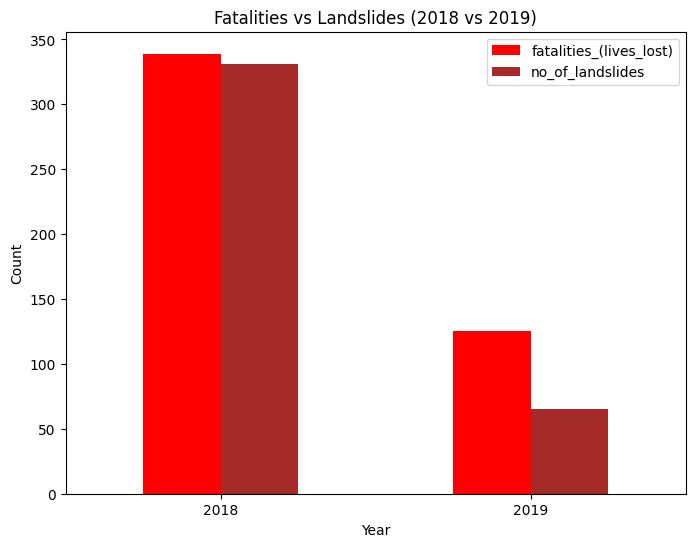

In [ ]:
# Just comparing fatalities and landslides
subset = yearly_totals[["fatalities_(lives_lost)", "no_of_landslides"]]

subset.plot(kind="bar", figsize=(8, 6), color=["red", "brown"])
plt.title("Fatalities vs Landslides (2018 vs 2019)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


AHP

In [ ]:
!pip install ahpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 2.6 MB/s eta 0:00:00


In [ ]:
import ahpy

# Indicators
criteria = [
    'fatalities_pc_norm',
    'damaged_houses_pc_norm',
    'crop_damage_pc_norm',
    'fisheries_damage_pc_norm',
    'livestock_loss_pc_norm',
    'camps_pc_norm',
    'no_of_landslides_norm',
    'rainfall_deviation_norm'
]


In [ ]:
# Pairwise comparisons dictionary
comparisons = {
    ('fatalities_pc_norm', 'damaged_houses_pc_norm'): 5,  # fatalities >> houses
    ('fatalities_pc_norm', 'crop_damage_pc_norm'): 7,
    ('fatalities_pc_norm', 'fisheries_damage_pc_norm'): 7,
    ('fatalities_pc_norm', 'livestock_loss_pc_norm'): 7,
    ('fatalities_pc_norm', 'camps_pc_norm'): 5,
    ('fatalities_pc_norm', 'no_of_landslides_norm'): 5,
    ('fatalities_pc_norm', 'rainfall_deviation_norm'): 9,

    ('damaged_houses_pc_norm', 'crop_damage_pc_norm'): 3,
    ('damaged_houses_pc_norm', 'fisheries_damage_pc_norm'): 3,
    ('damaged_houses_pc_norm', 'livestock_loss_pc_norm'): 3,
    ('damaged_houses_pc_norm', 'camps_pc_norm'): 2,
    ('damaged_houses_pc_norm', 'no_of_landslides_norm'): 2,
    ('damaged_houses_pc_norm', 'rainfall_deviation_norm'): 5,

    ('crop_damage_pc_norm', 'fisheries_damage_pc_norm'): 2,
    ('crop_damage_pc_norm', 'livestock_loss_pc_norm'): 2,
    ('crop_damage_pc_norm', 'camps_pc_norm'): 2,
    ('crop_damage_pc_norm', 'no_of_landslides_norm'): 2,
    ('crop_damage_pc_norm', 'rainfall_deviation_norm'): 3,

    ('fisheries_damage_pc_norm', 'livestock_loss_pc_norm'): 1,
    ('fisheries_damage_pc_norm', 'camps_pc_norm'): 1/2,
    ('fisheries_damage_pc_norm', 'no_of_landslides_norm'): 1/2,
    ('fisheries_damage_pc_norm', 'rainfall_deviation_norm'): 2,

    ('livestock_loss_pc_norm', 'camps_pc_norm'): 1/2,
    ('livestock_loss_pc_norm', 'no_of_landslides_norm'): 1/2,
    ('livestock_loss_pc_norm', 'rainfall_deviation_norm'): 2,

    ('camps_pc_norm', 'no_of_landslides_norm'): 1,
    ('camps_pc_norm', 'rainfall_deviation_norm'): 3,

    ('no_of_landslides_norm', 'rainfall_deviation_norm'): 3
}

In [ ]:
!pip install "numpy<2.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 115.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
criteria_ahp = ahpy.Compare('Criteria', comparisons, precision=3, random_index='saaty')

print("Weights:")
print(criteria_ahp.target_weights)   # <- gives weights dictionary

print("\nConsistency Ratio:")
print(criteria_ahp.consistency_ratio)   # <- CR value


Weights:
{'fatalities_pc_norm': 0.45, 'damaged_houses_pc_norm': 0.16, 'crop_damage_pc_norm': 0.1, 'camps_pc_norm': 0.081, 'no_of_landslides_norm': 0.081, 'fisheries_damage_pc_norm': 0.049, 'livestock_loss_pc_norm': 0.049, 'rainfall_deviation_norm': 0.03}

Consistency Ratio:
0.027


In [ ]:
# 3. Compute FSI with ahp weights
weights = {
    'fatalities_pc_norm': 0.45,
    'damaged_houses_pc_norm': 0.16,
    'crop_damage_pc_norm': 0.1,
    'fisheries_damage_pc_norm': 0.049,
    'livestock_loss_pc_norm': 0.049,
    'camps_pc_norm': 0.081,
    'no_of_landslides_norm': 0.081,
    'rainfall_deviation_norm': 0.03
}

In [ ]:
# Only use available columns
available_cols = [col for col in weights if col in df_normalized.columns]

#adjust weights if any variables are missing
total_weight = sum(weights[col] for col in available_cols)
adjusted_weights = {col: weights[col] / total_weight for col in available_cols}

In [ ]:
# Calculate FSI
df_normalized['FSI'] = sum(
    df_normalized[col].fillna(0) * w for col, w in adjusted_weights.items()
)

In [ ]:
# Get thresholds across all years
low_thr = df_normalized['FSI'].quantile(0.33)
high_thr = df_normalized['FSI'].quantile(0.66)

def categorize(val):
    if val <= low_thr:
        return 'Low'
    elif val <= high_thr:
        return 'Medium'
    else:
        return 'High'

df_normalized['FSI_category'] = df_normalized['FSI'].apply(categorize)


In [ ]:
# Step 3: Print final output columns
output_cols = ['district', 'Year', 'FSI', 'FSI_category']
print('FSI using AHP\n', df_normalized[output_cols].to_string(index=False))

FSI using AHP
           district  Year      FSI FSI_category
Thiruvananthapuram  2018 0.063784       Medium
            Kollam  2018 0.052201          Low
    Pathanamthitta  2018 0.276176         High
         Alappuzha  2018 0.429816         High
          Kottayam  2018 0.171649         High
            Idukki  2018 0.708202         High
         Ernakulam  2018 0.367335         High
          Thrissur  2018 0.356845         High
          Palakkad  2018 0.118448       Medium
        Malappuram  2018 0.131960         High
         Kozhikode  2018 0.079542       Medium
           Wayanad  2018 0.289663         High
            Kannur  2018 0.042993          Low
        Kasaragode  2018 0.007686          Low
Thiruvananthapuram  2019 0.017950          Low
            Kollam  2019 0.016850          Low
    Pathanamthitta  2019 0.020453          Low
         Alappuzha  2019 0.053218          Low
          Kottayam  2019 0.035159          Low
            Idukki  2019 0.065149       Mediu

# Decision Tree

In [ ]:
# Drop rows with missing target
df_dt = df_normalized.dropna(subset=['FSI_category'])

# Define features and target
features = [
    'fatalities_pc_norm',
    'damaged_houses_pc_norm',
    'crop_damage_pc_norm',
    'fisheries_damage_pc_norm',
    'livestock_loss_pc_norm',
    'camps_pc_norm',
    'no_of_landslides_norm',
    'rainfall_deviation_norm'
]

X = df_dt[features]
y = df_dt['FSI_category']

In [ ]:
# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 3, 4, 5, 6, 8, 10, 15],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

dt_base = DecisionTreeClassifier(random_state=42)

# Multiple metrics scoring
scoring = {
    'f1_macro': 'f1_macro',
    'accuracy': make_scorer(accuracy_score)
}

# RandomizedSearchCV
dt_search = RandomizedSearchCV(
    estimator=dt_base,
    param_distributions=param_grid,
    n_iter=30,            # increase for more thorough search
    cv=5,
    scoring=scoring,
    refit='f1_macro',
    n_jobs=-1,
    random_state=42
)

dt_search.fit(X, y_encoded)

print("✅ Best Params:", dt_search.best_params_)
print("✅ Best CV F1:", dt_search.cv_results_['mean_test_f1_macro'][dt_search.best_index_])
print("✅ Best CV Accuracy:", dt_search.cv_results_['mean_test_accuracy'][dt_search.best_index_])


✅ Best Params: {'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 4, 'criterion': 'log_loss', 'class_weight': None}
✅ Best CV F1: 0.7111111111111111
✅ Best CV Accuracy: 0.7466666666666666


In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Use best found hyperparameters
best_dt = DecisionTreeClassifier(**dt_search.best_params_, random_state=42)

loo = LeaveOneOut()
y_true = []
y_pred = []

# LOOCV with tuned Decision Tree
X_np = X.to_numpy()
y_np = y_encoded

for train_index, test_index in loo.split(X_np):
    X_train, X_test = X_np[train_index], X_np[test_index]
    y_train, y_test = y_np[train_index], y_np[test_index]

    best_dt.fit(X_train, y_train)
    pred = best_dt.predict(X_test)

    y_true.append(y_test[0])
    y_pred.append(pred[0])

# Decode labels back to original
y_true_labels = le.inverse_transform(y_true)
y_pred_labels = le.inverse_transform(y_pred)

# Metrics
acc = accuracy_score(y_true_labels, y_pred_labels)
f1_macro = f1_score(y_true_labels, y_pred_labels, average='macro')

print(f"\n🎯 Tuned LOOCV Accuracy: {acc:.2f}")
print(f"🎯 Tuned LOOCV Macro F1 Score: {f1_macro:.2f}\n")

print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels))

print("Confusion Matrix:")
print(confusion_matrix(y_true_labels, y_pred_labels))



🎯 Tuned LOOCV Accuracy: 0.82
🎯 Tuned LOOCV Macro F1 Score: 0.82

Classification Report:
              precision    recall  f1-score   support

        High       0.80      0.80      0.80        10
         Low       0.90      1.00      0.95         9
      Medium       0.75      0.67      0.71         9

    accuracy                           0.82        28
   macro avg       0.82      0.82      0.82        28
weighted avg       0.82      0.82      0.82        28

Confusion Matrix:
[[8 0 2]
 [0 9 0]
 [2 1 6]]


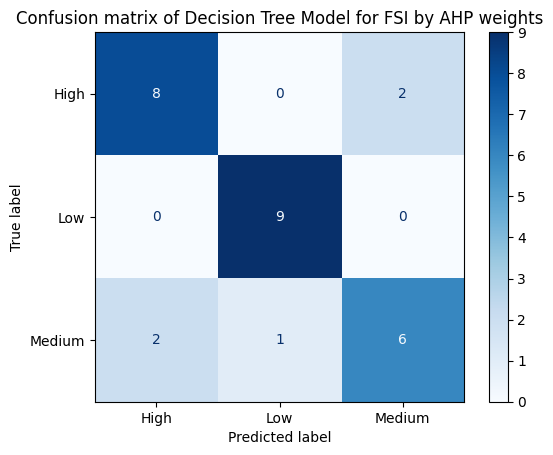

In [ ]:
#confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion matrix of Decision Tree Model for FSI by AHP weights')
plt.show()


In [ ]:
#displaying results
results_df = pd.DataFrame({
    'District': df_dt['district'].reset_index(drop=True),
    'Year': df_dt['Year'].reset_index(drop=True),
    'Actual_FSI_Category': le.inverse_transform(y_true),
    'Predicted_FSI_Category': le.inverse_transform(y_pred)
})

results_df

,District,Year,Actual_FSI_Category,Predicted_FSI_Category
0,Thiruvananthapuram,2018,Medium,Medium
1,Kollam,2018,Low,Low
2,Pathanamthitta,2018,High,Medium
3,Alappuzha,2018,High,High
4,Kottayam,2018,High,High
5,Idukki,2018,High,High
6,Ernakulam,2018,High,High
7,Thrissur,2018,High,High
8,Palakkad,2018,Medium,High
9,Malappuram,2018,High,Medium


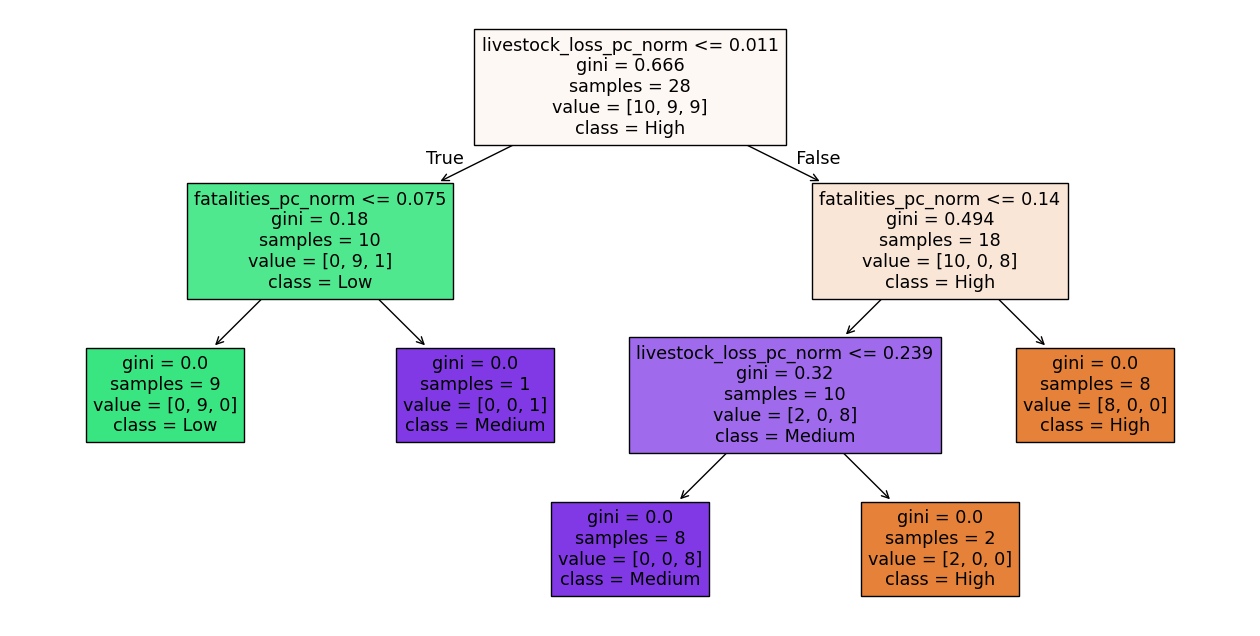

In [ ]:
clf.fit(X_np, y_np)  # Train on full data for visualization

plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=features, class_names=le.classes_, filled=True)
plt.show()


/tmp/ipython-input-3306570576.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correct', y='District', data=accuracy_by_district.sort_values('Correct'), palette='coolwarm')


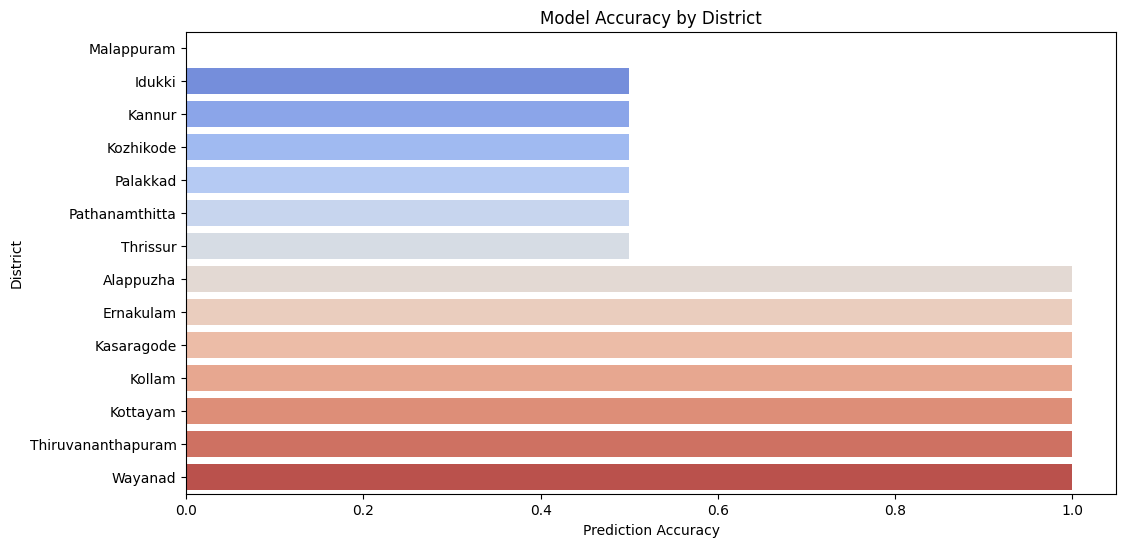

In [ ]:
import seaborn as sns
results_df['Correct'] = results_df['Actual_FSI_Category'] == results_df['Predicted_FSI_Category']
accuracy_by_district = results_df.groupby('District')['Correct'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Correct', y='District', data=accuracy_by_district.sort_values('Correct'), palette='coolwarm')
plt.xlabel("Prediction Accuracy")
plt.title("Model Accuracy by District")
plt.show()


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df_rf = df_normalized.dropna(subset=['FSI_category'])
df_rf

,district,Year,actual_rainfall_in_mm,normal_rainfall_in_mm,Mid_year_population,fatalities_(lives_lost),no_of_camps,total_damaged_houses_(partially_or_fully),no_of_landslides,total_crop_sector_damage_(in_INR_crore),Fisheries_sector_damage_(in_INR_lakh),"livestock_loss_(cows,buffalo,sheep/goat,poultry,pig,quail,heifer)",rainfall_deviation,fatalities_pc,damaged_houses_pc,crop_damage_pc,fisheries_damage_pc,livestock_loss_pc,camps_pc,fatalities_pc_norm,damaged_houses_pc_norm,crop_damage_pc_norm,fisheries_damage_pc_norm,livestock_loss_pc_norm,camps_pc_norm,no_of_landslides_norm,rainfall_deviation_norm,FSI,FSI_category
0,Thiruvananthapuram,2018,373.8,142.0,3355148,11,94,2572,0,113.40,143.000,10662,1.632394,3.278544e-06,0.000767,337.988071,4.262107,0.003178,0.000028,0.066370,0.027341,0.040597,0.034941,0.013426,0.007162,0.000000,0.751099,0.063784,Medium
1,Kollam,2018,644.1,258.7,2659431,5,168,3384,2,54.60,152.000,5755,1.489756,1.880101e-06,0.001272,205.307075,5.715508,0.002164,0.000063,0.038060,0.046942,0.017763,0.046856,0.009143,0.016634,0.013986,0.685430,0.052201,Low
2,Pathanamthitta,2018,764.9,352.7,1172212,3,4352,17805,8,218.90,277.000,99317,1.168699,2.559264e-06,0.015189,1867.409649,23.630538,0.084726,0.003713,0.051809,0.586179,0.303804,0.193726,0.357967,1.000000,0.055944,0.537619,0.276176,High
3,Alappuzha,2018,608.2,343.1,2146033,43,2126,40922,0,353.80,1153.000,507938,0.772661,2.003697e-05,0.019069,1648.623297,53.727040,0.236687,0.000991,0.405621,0.736496,0.266152,0.440460,1.000000,0.266552,0.000000,0.355289,0.429816,High
4,Kottayam,2018,619.2,386.0,1983573,14,788,17108,29,71.00,607.000,39944,0.604145,7.057971e-06,0.008625,357.939940,30.601344,0.020137,0.000397,0.142879,0.331827,0.044030,0.250873,0.085080,0.106657,0.202797,0.277706,0.171649,High
5,Idukki,2018,1478.9,527.3,1093156,54,363,8496,143,588.80,123.000,9560,1.804665,4.939826e-05,0.007772,5386.239475,11.251825,0.008745,0.000332,1.000000,0.298781,0.909380,0.092244,0.036949,0.089089,1.000000,0.830410,0.708202,High
6,Ernakulam,2018,648.3,401.3,3427659,58,1582,88671,0,129.30,1344.000,234658,0.615500,1.692117e-05,0.025869,377.225389,39.210435,0.068460,0.000462,0.342546,1.000000,0.047349,0.321451,0.289243,0.123976,0.000000,0.282934,0.367335,High
7,Thrissur,2018,734.7,440.1,3243170,72,1513,24453,26,197.40,3956.000,257118,0.669393,2.220050e-05,0.007540,608.663746,121.979421,0.079280,0.000467,0.449419,0.289786,0.087179,1.000000,0.334957,0.125318,0.181818,0.307746,0.356845,High
8,Palakkad,2018,848.8,333.8,2952254,20,165,8073,20,108.60,73.000,11117,1.542840,6.774485e-06,0.002735,367.854527,2.472687,0.003766,0.000056,0.137140,0.103593,0.045737,0.020271,0.015910,0.014672,0.139860,0.709869,0.118448,Medium
9,Malappuram,2018,913.7,395.3,4494998,30,213,7630,30,161.30,274.000,391971,1.311409,6.674085e-06,0.001697,358.843319,6.095665,0.087202,0.000047,0.135108,0.063409,0.044186,0.049973,0.368426,0.012381,0.209790,0.603321,0.131960,High


In [ ]:
# 2. Define your features and target
features = [
    'fatalities_(lives_lost)',
    'no_of_camps',
    'total_damaged_houses_(partially_or_fully)',
    'no_of_landslides',
    'total_crop_sector_damage_(in_INR_crore)',
    'Fisheries_sector_damage_(in_INR_lakh)',
    'livestock_loss_(cows,buffalo,sheep/goat,poultry,pig,quail,heifer)',
    'rainfall_deviation'
]

X1 = df_rf[features]
y1 = df_rf['FSI_category']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
# Encode the target labels
le = LabelEncoder()
y1_encoded = le.fit_transform(y1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# 1. Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

rf_base = RandomForestClassifier(random_state=42)

# 2. Multiple metrics
scoring = {
    'f1_macro': 'f1_macro',
    'accuracy': make_scorer(accuracy_score)
}

# 3. Run RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_grid,
    n_iter=20,       # can increase to 50+ if you want thorough search
    cv=5,
    scoring=scoring,
    refit='f1_macro',   # refit using best f1_macro
    n_jobs=-1,
    random_state=42
)

random_search.fit(X1, y1_encoded)

print("✅ Best Params:", random_search.best_params_)
print("✅ Best mean F1 (CV):", random_search.cv_results_['mean_test_f1_macro'][random_search.best_index_])
print("✅ Best mean Accuracy (CV):", random_search.cv_results_['mean_test_accuracy'][random_search.best_index_])


✅ Best Params: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': False}
✅ Best mean F1 (CV): 0.7733333333333332
✅ Best mean Accuracy (CV): 0.8266666666666665


In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score

# 1. Get best params and create final model
best_rf = RandomForestClassifier(**random_search.best_params_, random_state=42)

# 2. Run LOOCV
loo = LeaveOneOut()
y1_true, y1_pred = [], []

for train_idx, test_idx in loo.split(X1):
    X1_train, X1_test = X1.iloc[train_idx], X1.iloc[test_idx]
    y1_train, y1_test = y1_encoded[train_idx], y1_encoded[test_idx]

    best_rf.fit(X1_train, y1_train)
    y1_pred.append(best_rf.predict(X1_test)[0])
    y1_true.append(y1_test[0])

# 3. Evaluate
print("🎯 LOOCV Accuracy:", accuracy_score(y1_true, y1_pred))
print("🎯 LOOCV Macro F1:", f1_score(y1_true, y1_pred, average='macro'))


🎯 LOOCV Accuracy: 0.8214285714285714
🎯 LOOCV Macro F1: 0.8166666666666668


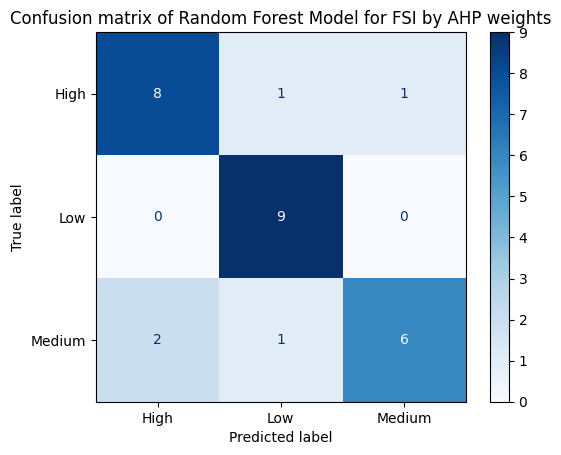

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y1_true, y1_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion matrix of Random Forest Model for FSI by AHP weights')
plt.show()
